# Data Analysis with Pandas

## Importing Libraries for Analysis

The following libraries are imported into Python so that we can create our data table and graphically plot it. 

Note the magic command `%matplotlib inline`; without this, any plots you create will only display the matplotlib object.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pandas import DataFrame, read_csv
%matplotlib inline

## Creating data for analysis

The information below is the data supplied for the assignment. I wanted to see if I could plot the data as it was presented for the assignment. Only blank rows were removed.

### Data is made up of two different flight statuses, and the location.

We create a variable for each, which is a list of values. The status data is a list of strings, while each location is a list of integers.

In [147]:
status = ['On Time', 'Delayed', 'On Time', 'Delayed']
losangeles = [497, 62, 694, 117]
phoenix = [221, 12, 4840, 415]
sandiego = [212, 20, 383, 65]
sanfran = [503, 102, 320, 129]
seattle = [1841, 305, 201, 61]

### Combine the data

The `zip` function is used to combine the data into a list of tuples in the following format:

`[('flight status', 'Quantity of on-time or delayed arrivals')]`

The `AirlineDelays` variable will hold all of the data, which we will then pass into a DataFrame.

In [55]:
AirlineDelays = zip(status, losangeles, phoenix, sandiego, sanfran, seattle)
AirlineDelays

[('On Time', 497, 221, 212, 503, 1841),
 ('Delayed', 62, 12, 20, 102, 305),
 ('On Time', 694, 4840, 383, 320, 201),
 ('Delayed', 117, 415, 65, 129, 61)]

### Create a DataFrame object

Now that the data is "zipped" together, we can take the data and put it in a DataFame.

In [75]:
df = DataFrame(data = AirlineDelays, columns=['Status', 'LA', 'PHX', 'Sandiego', 'SanFran', 'Seattle'],
              index=['Alaska', 'Alaska', 'AM West', 'AM West'])
df

,Status,LA,PHX,Sandiego,SanFran,Seattle
Alaska,On Time,497,221,212,503,1841
Alaska,Delayed,62,12,20,102,305
AM West,On Time,694,4840,383,320,201
AM West,Delayed,117,415,65,129,61


### Send DataFrame to a .csv File

Now that the DataFrame of our flight data is contained in the `df` object, we will just the `.to_csv` command to create the .csv file.

*Please note - when creating a .csv file within an IPython Notebook, the file will be created in the same directory as the notebook. The filepath below is different as system permissions would not let the notebook access the .csv file from the same directory.*

In [60]:
df.to_csv('airlinedly.csv', index=True, header=True)

In [63]:
csvfile = r'/Users/Shared/airlinedly.csv'
df = pd.read_csv(csvfile)

The `df` object now points to an opened .csv file:

In [64]:
df

,Unnamed: 0,Status,LA,PHX,Sandiego,SanFran,Seattle
0,Alaska,On Time,497,221,212,503,1841
1,Alaska,Delayed,62,12,20,102,305
2,AM West,On Time,694,4840,383,320,201
3,AM West,Delayed,117,415,65,129,61


We can check the index and columns of our DataFrame object using the `.index` and `.columns` parameters:

In [150]:
df.index

Index([u'Alaska', u'Alaska', u'AM West', u'AM West'], dtype='object')

In [151]:
df.columns

Index([u'Status', u'LA', u'PHX', u'Sandiego', u'SanFran', u'Seattle'], dtype='object')

## Plotting Our Data

Now that the data is put together and formatted the way we want, we can create some graphs using the `matplotlib` .plot function.

Following is all of the data plotted as a horizontal bar chart. Displayed is each airline, grouped by arrival city, displaying delayed arrivals, then on-time arrivals:

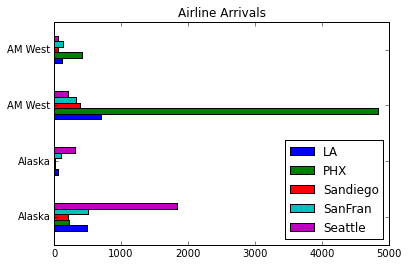

In [111]:
df.plot(kind='barh', title='Airline Arrivals')

### Plotting DataFrame by Index

We can plot just the cities by using a 'slice' of the dataframe labels. Note instead of a horizontal bar chart ('barh'), we created a normal vertical bar chart using `kind='bar'`. Also, a title for the chart can be added using the parameter `title='Name of Chart'`.

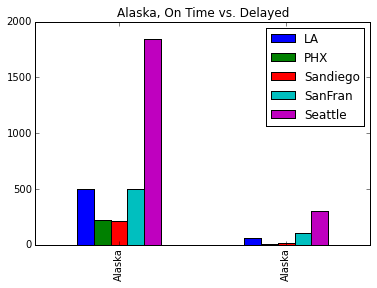

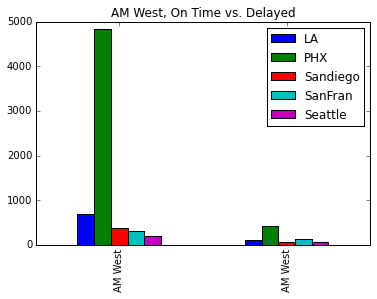

In [121]:
df.loc['Alaska'].plot(kind='bar', title='Alaska, On Time vs. Delayed')
df.loc['AM West'].plot(kind='bar', title='AM West, On Time vs. Delayed')

Based on the information of above, we can see that Alaska airlines has the most arrival delays for the Seattle destination, and America West has the most delays to Phoenix.

For a percentage, I was not able to successfully create the calculation by slicing the chart. However, despite the larger bars, the San Francisco destination is the airport with the highest percent of delayed flights for both airlines.

### Slicing Rows of Data

If we sclice the rows, we can select just the rows with the quantities of delayed arrivals for each airline, so we can just compare the delays only:

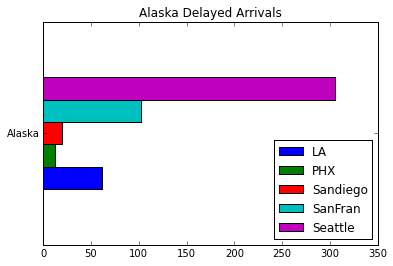

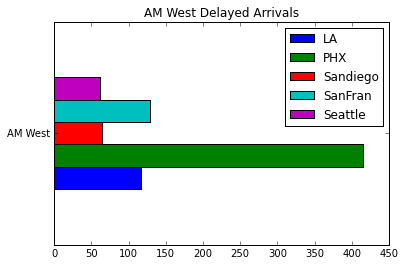

In [152]:
df[1:2].plot(kind='barh', title='Alaska Delayed Arrivals')
df[3:].plot(kind='barh', title='AM West Delayed Arrivals')